In [1]:
import pandas as pd
df=pd.read_excel(r'C:\Users\hp\Desktop\edureka\assignments\assignment13\training-ReviewsFileName\ReviewsFileName.xlsx')
print(df.shape)
df.head()

(10662, 2)


,Review,Sentiment
0,the rock is destined to be the 21st century's ...,0
1,"the gorgeously elaborate continuation of "" the...",0
2,effective but too-tepid biopic\n,0
3,if you sometimes like to go to the movies to h...,0
4,"emerges as something rare , an issue movie tha...",0


In [2]:
from sklearn import preprocessing,metrics
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix
import pandas as pd, numpy as np
import re,nltk, string
#import textblob
from string import punctuation

import warnings
warnings.filterwarnings('ignore')

df = pd.read_excel(r'C:\Users\hp\Desktop\edureka\assignments\assignment13\training-ReviewsFileName\ReviewsFileName.xlsx')
print(df.shape)
print(df.head())
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
stop_words=set(stopwords.words('english'))

import re
from nltk.stem.porter import PorterStemmer
st = PorterStemmer()
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

# Combining all the above stundents 
#from tqdm import tqdm
preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in df['Review'].values:
    sentance = re.sub(r"http\S+", "", sentance)
    #sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentence = ' '.join(st.stem(wd) for wd in sentance.split(' '))
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stop_words)
    preprocessed_reviews.append(sentance.strip())


from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist

ss = [i.split() for i in preprocessed_reviews]
words_list = [o for ss in ss for o in ss]
word_dict=FreqDist(words_list)
ranked_word_dict={key: rank for rank, key in enumerate(sorted(word_dict, key=word_dict.get,reverse=True), 1)}
print(list(ranked_word_dict.keys())[:30])
top30words = list(ranked_word_dict.keys())[:30]

with open("nlargest.txt", "w") as output:
    output.write(str(top30words))
    
X=preprocessed_reviews
Y=df['Sentiment']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.33,stratify=Y,random_state=42)

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

tdf_idf_vect=TfidfVectorizer(ngram_range=(1, 2),min_df=7,max_df=0.3)
stand=StandardScaler(with_mean=False,with_std=False)
model = RandomForestClassifier(max_depth=15,n_estimators=100)

steps =[('tfidf',tdf_idf_vect),('standscalar',stand),('clf',model)]
ppl = Pipeline(steps)
ppl.fit(x_train,y_train)

print('test accuracy with pipeline:',ppl.score(x_test,y_test))
print('train accuracy with pipeline:',ppl.score(x_train,y_train))

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
params=dict(clf__max_depth = [2,5,8,10,15,18,20],
            clf__n_estimators = [5,15,25,50,65,80,100])

grid= GridSearchCV(ppl,param_grid=params)
grid.fit(x_train,y_train)

print('train accuracy:',grid.best_score_)

best_parameters = grid.best_estimator_.get_params()
for param_name in sorted(params.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

print('predictions:',grid.predict(x_test))

print('Test accuracy:',grid.score(x_test,y_test))
print('Train accuracy:',grid.score(x_train,y_train))
print('confusion matrix on Train data:\n',confusion_matrix(y_train,grid.predict(x_train)))

print('confusion matrix on test data:\n',confusion_matrix(y_test,grid.predict(x_test)))
confusion_matrix(y_train,grid.predict(x_train)).tofile('cfmatrix.txt',sep=',')

(10662, 2)
                                              Review  Sentiment
0  the rock is destined to be the 21st century's ...          0
1  the gorgeously elaborate continuation of " the...          0
2                   effective but too-tepid biopic\n          0
3  if you sometimes like to go to the movies to h...          0
4  emerges as something rare , an issue movie tha...          0
['film', 'movie', 'one', 'like', 'story', 'good', 'much', 'even', 'comedy', 'time', 'characters', 'well', 'would', 'director', 'little', 'way', 'funny', 'make', 'enough', 'never', 'life', 'makes', 'bad', 'may', 'best', 'us', 'work', 'love', 'made', 'could']
test accuracy with pipeline: 0.649616368286445
train accuracy with pipeline: 0.7737645247095059
train accuracy: 0.6707256450515826
	clf__max_depth: 20
	clf__n_estimators: 100
predictions: [0 1 0 ... 1 1 1]
Test accuracy: 0.6658141517476556
Train accuracy: 0.8017639647207055
confusion matrix on Train data:
 [[3057  514]
 [ 902 2670]]
confusion ma

In [47]:
ppl.named_steps

{'tfidf': TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=0.3, max_features=None, min_df=7,
         ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
         stop_words=None, strip_accents=None, sublinear_tf=False,
         token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
         vocabulary=None),
 'clf': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=15, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False)}

### Getting the most frequent words without NLTK library

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
def wordtofreq(wordlst):
    bow = CountVectorizer(lowercase= False)
    bow_words = bow.fit_transform(wordlst)
    #print(bow_words.shape)
    freqs = bow_words.sum(axis=0).A1
    index = freqs.argsort()
    words = bow.get_feature_names()
    return dict(list(zip(words,freqs)))

def converting_text_to_numeric_on_rankings(text):
    review_count=list()
    for i in text:
        review_count.append(i.split())

    words_list=[item for review_count in review_count for item in review_count]

    word_dict=wordtofreq(words_list)

    #https://stackoverflow.com/questions/40488532/python-sorting-the-values-of-a-dict-and-extracting-the-keys-corresponding-to-th
    ranked_word_dict={key: rank for rank, key in enumerate(sorted(word_dict, key=word_dict.get,reverse=True), 1)}
    
    return ranked_word_dict

In [9]:
list(converting_text_to_numeric_on_rankings(preprocessed_reviews).keys())[:30]

['film',
 'movie',
 'one',
 'like',
 'story',
 'good',
 'much',
 'even',
 'comedy',
 'time',
 'characters',
 'well',
 'would',
 'director',
 'little',
 'way',
 'funny',
 'make',
 'enough',
 'never',
 'life',
 'makes',
 'bad',
 'may',
 'best',
 'us',
 'work',
 'love',
 'could',
 'made']

## Applying the individually without pipeline

In [20]:
X=preprocessed_reviews
Y=df['Sentiment']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.33,stratify=Y,random_state=42)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vect= TfidfVectorizer(ngram_range=(1,2),min_df=7,max_df=0.3) #initiating Tfidf
#machine is reading or learning all the text reviews from training data
tf_idf_vect.fit(x_train)

#Now transforming all the words learnt into vectors.
x_trn_tfidf=tf_idf_vect.transform(x_train)
x_tst_tfidf= tf_idf_vect.transform(x_test)

from sklearn.preprocessing import StandardScaler
stand=StandardScaler(with_mean=False,with_std=False)
x_trn_tfidf=stand.fit_transform(x_trn_tfidf)
x_tst_tfidf=stand.transform(x_tst_tfidf)

x_trn_tfidf.shape,x_tst_tfidf.shape

((7143, 2381), (3519, 2381))

In [22]:
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
#import math
from sklearn.ensemble import RandomForestClassifier

model2=RandomForestClassifier()
parameters={'max_depth' :[2,5,8,10,15,18,20],
            'n_estimators' :[5,15,25,50,65,80,100]}
clf2=GridSearchCV(model2,parameters,cv=10,scoring='roc_auc',return_train_score=True)
best_clf2=clf2.fit(x_trn_tfidf,y_train)

In [23]:
best_alpha_tfidf=clf2.best_params_['max_depth']
best_reg_tfidf=clf2.best_params_['n_estimators']
print(best_alpha_tfidf)
print(best_reg_tfidf)

15
100


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.7225022934001757


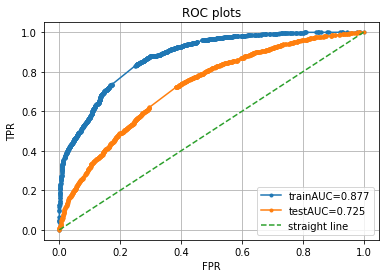

In [24]:
#Now testing with Test data.
from sklearn.ensemble import RandomForestClassifier
model2s = RandomForestClassifier(max_depth=best_alpha_tfidf,n_estimators=best_reg_tfidf)
model2s.fit(x_trn_tfidf, y_train)
y_trn_predss=model2s.predict(x_trn_tfidf)
y_tst_predss= model2s.predict(x_tst_tfidf)

#(area under the curve)AUC= roc_auc_score(y_true, y_probs) the 2nd parameter should be probability estimates 
#  of the positive class not the predicted outputs.

x_trn_probss=model2s.predict_proba(x_trn_tfidf)[:,1]
x_tst_probss=model2s.predict_proba(x_tst_tfidf)[:,1]
print(clf2.best_estimator_)
print(clf2.score(x_tst_tfidf, y_test))
# Also we have direct library 'auc' to find the Area Under the ROC Curve. i have plotted in below graph.
from sklearn.metrics import roc_curve,auc
train_fpr,train_tpr,threshold=roc_curve(y_train,x_trn_probss)
test_fpr,test_tpr,thresholds=roc_curve(y_test,x_tst_probss)
plt.plot(train_fpr,train_tpr,marker='.',label='trainAUC='+str(np.round(auc(train_fpr,train_tpr),3)))
plt.plot(test_fpr,test_tpr,marker='.',label='testAUC='+str(np.round(auc(test_fpr,test_tpr),3)))
plt.plot([0, 1], [0, 1], linestyle='--',label='straight line')
plt.legend()
plt.title('ROC plots')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.show()

In [25]:
def find_best_threshold(Threshold, fpr, tpr):
    t = Threshold[np.argmax(tpr*(1-fpr))]
    print("the maximum value of tpr*(1-fpr):", max(tpr*(1-fpr)), "------> for Threshold:", np.round(t,3))
    return t

def predict_with_best_t(proba, Threshold):
    predictions = []
    for i in proba:
        if i>=Threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr): 0.6242765145255281 ------> for Threshold: 0.496
confusion matrix using train data:
[[3026  545]
 [1047 2525]]


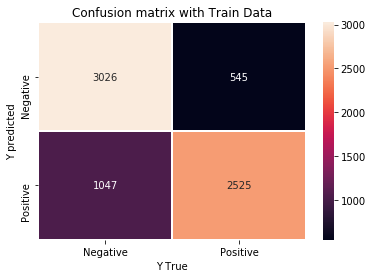

In [26]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(threshold, train_fpr, train_tpr)
print('confusion matrix using train data:')
print(confusion_matrix(y_train,predict_with_best_t(y_trn_predss, best_t)))

q=confusion_matrix(y_train,predict_with_best_t(y_trn_predss, best_t))
import seaborn as sns
sns.heatmap(q, annot=True, fmt="d" ,linewidths=.5,xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.title('Confusion matrix with Train Data')
plt.xlabel('Y True')
plt.ylabel('Y predicted')
plt.show()

confusion matrix using test data:
[[1283  477]
 [ 730 1029]]


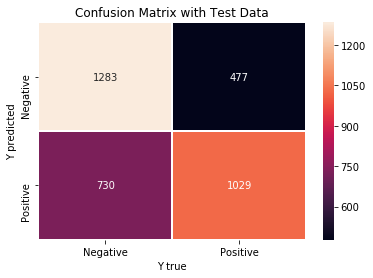

In [27]:
print('confusion matrix using test data:')
print(confusion_matrix(y_test,predict_with_best_t(y_tst_predss, best_t)))
w=confusion_matrix(y_test,predict_with_best_t(y_tst_predss, best_t))
import seaborn as sns
sns.heatmap(w, annot=True, fmt="d",linewidths=.5,xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.title('Confusion Matrix with Test Data')
plt.xlabel('Y true')
plt.ylabel('Y predicted')
plt.show()

### Important features

In [28]:
# the below argsort gives the sorted feature_importance indices as output.
prob_sorted_indicess = model2s.feature_importances_.argsort()[::-1]
#now getting the features_names as with those top 10 sorted indices.
TOP30_features=np.take(tf_idf_vect.get_feature_names(), prob_sorted_indicess[:30])
pd.DataFrame(TOP30_features,columns=['Top30_features'])

,Top30_features
0,bad
1,movie
2,enjoyable
3,look
4,like
5,dull
6,tv
7,much
8,would
9,film


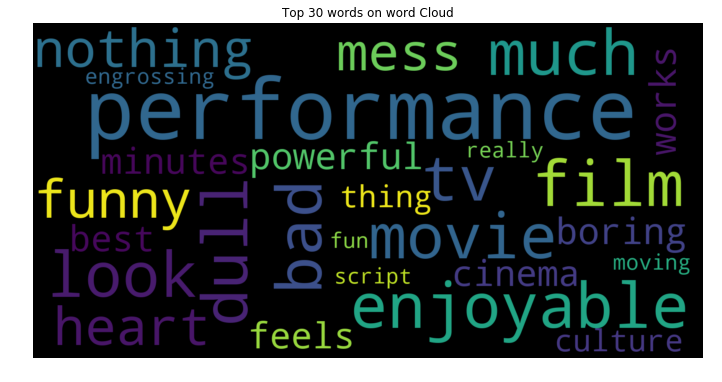

In [29]:
d=tf_idf_vect.get_feature_names()
st=list()
for t in TOP30_features:
    st.append(t)
st = pd.Series(st).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200)
wordcloud.generate(st)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Top 30 words on word Cloud')
plt.axis("off")
plt.show()